# IMDB數據集

IMDB數據集（Internet Movie Database Dataset）是電影評論數據集，廣泛用於自然語言處理（NLP）領域中的文本分類任務，尤其是情感分析。IMDB數據集由來自IMDB網站的電影評論構成，並標記為正面評論或負面評論。


常見的IMDB數據集特點：

規模：包含50,000條評論，其中25,000條用作訓練集，另外25,000條用作測試集。

標籤：評論按照情感標籤分為正面（positive）或負面（negative）。

應用：IMDB數據集經常用於文本分類、情感分析的模型訓練和測試，如使用LSTM、BERT等深度學習模型。

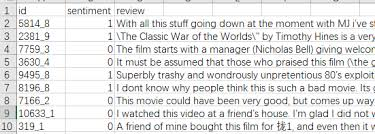

In [1]:
!pip install tensorflow
!pip install numpy

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import random


In [3]:
# Step 1: 設定參數
# 定義模型和數據集的基本參數，包括詞彙數量、評論長度等
max_features = 10000  # 僅考慮數據集中最常見的 10,000 個單詞
maxlen = 500  # 每條評論的長度固定為 500 個詞
batch_size = 64  # 每次訓練的批次大小

In [4]:
# Step 2: 加載 IMDB 數據集
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
# Step 3: 數據預處理
# 將每條評論填充或截斷為固定長度 500，這樣 RNN 能處理固定長度的輸入
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [6]:
# 隨機選擇評論顯示
import random
# 獲取詞彙表的索引映射
word_index = imdb.get_word_index()
# 建立從索引到單詞的映射
reverse_word_index = {value: key for (key, value) in word_index.items()}
# 選擇一個評論，將其轉換為文字，並過濾掉特殊符號
def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review if i >= 3])
random_indices = random.sample(range(len(x_train)), 1)
print("隨機挑選的5個評論（已截斷至500詞）：\n")
for i in random_indices:
    print(f"評論 {i} 的原始文字:")
    print(f"對應標籤（0=負面, 1=正面）: {y_train[i]}")
    print(decode_review(x_train[i]))
    print('-' * 80)


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step
隨機挑選的5個評論（已截斷至500詞）：

評論 6130 的原始文字:
對應標籤（0=負面, 1=正面）: 1
wow has followed up and z boys with an equally stunning documentary about the history of the big wave surfing culture in america together footage along with interviews from surfing legends we are transported into the daring and free spirited life of the early whose sheer passion for the sport an industry that today touches the lives of millions br br it's getting to know these icons and their stories that gives the film its warmth you can feel the respect has for this group as we hear accounts of greg from a pack of fellow surfers on the beach to challenge 50 foot off north coast or jeff clark surfing the outrageously dangerous maverick off the northern california coast all alone for 15 years before it was discovered and became the surfing destination in california and the history of hamilton today's surfing icon hearing greg refer to hamilton as the best ever sent chills up my spi

In [16]:
# Step 4: 構建 RNN 模型
# 構建 LSTM 模型
model = Sequential()
model.add(Embedding(max_features, 128))  # 將詞彙轉換為 128 維向量
model.add(LSTM(128, return_sequences=True))  # 使用 LSTM 層
model.add(Dropout(0.5))  # 添加 Dropout 防止過擬合
model.add(LSTM(128))  # 第二個 LSTM 層
model.add(Dropout(0.5))  # 再次添加 Dropout
model.add(Dense(1, activation='sigmoid'))  # 輸出一個二分類結果

In [17]:
# Step 5: 編譯模型
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
# Step 6: 訓練模型
model.fit(x_train, y_train, epochs=5, batch_size=batch_size, validation_data=(x_test, y_test))


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 73ms/step - accuracy: 0.6991 - loss: 0.5549 - val_accuracy: 0.8678 - val_loss: 0.3199
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 62ms/step - accuracy: 0.8679 - loss: 0.3236 - val_accuracy: 0.8522 - val_loss: 0.3639
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.9077 - loss: 0.2441 - val_accuracy: 0.8560 - val_loss: 0.3476
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - accuracy: 0.9094 - loss: 0.2281 - val_accuracy: 0.8589 - val_loss: 0.3271
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 63ms/step - accuracy: 0.9457 - loss: 0.1532 - val_accuracy: 0.8678 - val_loss: 0.3262


In [19]:
# 評估模型
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'測試損失: {test_loss}')
print(f'測試準確率: {test_acc}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.8681 - loss: 0.3302
測試損失: 0.32619309425354004
測試準確率: 0.8677999973297119


In [22]:
# 預測測試集中的評論
y_pred = model.predict(x_test)


782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step


In [25]:

# 隨機選擇 2 個樣本進行比較
random_indices = random.sample(range(len(x_test)), 2)
for i in random_indices:
    pred_label = 1 if y_pred[i][0] >= 0.5 else 0  # 判斷預測結果是否大於等於 0.5
    print(f"評論 {i}:")
    print(f"預測結果: {y_pred[i][0]:.2f} -> 預測標籤: {pred_label} (0=負面, 1=正面)")
    print(f"實際結果: {y_test[i]} (0=負面, 1=正面)")
    print('-' * 80)

評論 21383:
預測結果: 0.11 -> 預測標籤: 0 (0=負面, 1=正面)
實際結果: 0 (0=負面, 1=正面)
--------------------------------------------------------------------------------
評論 8080:
預測結果: 0.99 -> 預測標籤: 1 (0=負面, 1=正面)
實際結果: 1 (0=負面, 1=正面)
--------------------------------------------------------------------------------
